In [ ]:
# Install OpenCV
!pip install opencv-python-headless

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

Saving a11.jpg to a11.jpg


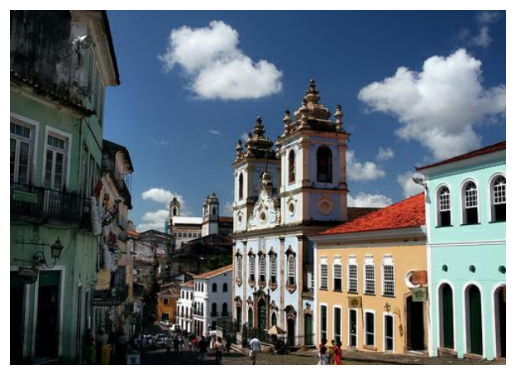

In [3]:
#input image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
img = cv2.imread(image_path)

# Resize image for better performance
height, width = img.shape[:2]
target_width = 600
aspect_ratio = width / height
target_height = int(target_width / aspect_ratio)

img = cv2.resize(img, (target_width, target_height))

# Convert BGR to RGB since by default opencv process RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.axis('off')
plt.show()

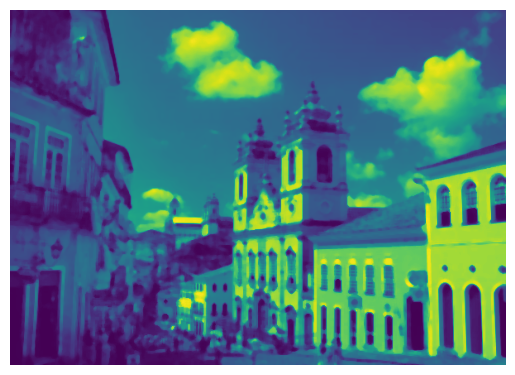

In [5]:
# Convert the image to grayscale and apply median blur to reduce image noise
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.medianBlur(gray, 5)

plt.imshow(gray)
plt.axis('off')
plt.show()

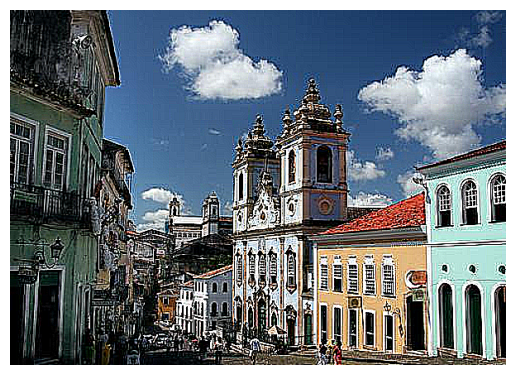

In [6]:
# Define a kernel for sharpening
sharpen_kernel = np.array([[-1,-1,-1],
                           [-1, 9,-1],
                           [-1,-1,-1]])

# Apply the sharpening kernel to the image
sharpened_img = cv2.filter2D(img, -1, sharpen_kernel)

sharpened_img_rgb = cv2.cvtColor(sharpened_img, cv2.COLOR_BGR2RGB)

plt.imshow(sharpened_img_rgb)
plt.axis('off')
plt.show()

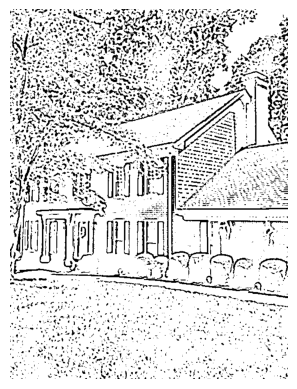

In [ ]:
# Detect edges using enhanced adaptive thresholding
# Canny Edge detection
edges = cv2.adaptiveThreshold(gray, 255,
                              cv2.ADAPTIVE_THRESH_MEAN_C,
                              cv2.THRESH_BINARY, 7, 7)
# Display the edges
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.show()


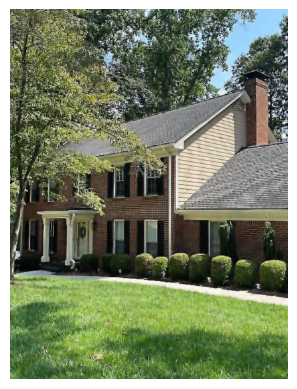

In [ ]:
# Apply enhanced bilateral filter to smooth the colors while keeping details
no_of_filters= 3
for i in range(no_of_filters):
  color = cv2.bilateralFilter(sharpened_img, 9, 300, 300) # Adjusted sigma values for more clarity

color_rgb = cv2.cvtColor(color, cv2.COLOR_BGR2RGB)

plt.imshow(color_rgb)
plt.axis('off')
plt.show()


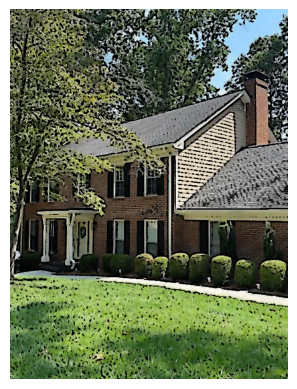

In [ ]:
# Combine the enhanced edge mask with the smoothed color image
cartoon = cv2.bitwise_and(color, color, mask=edges)

# Convert BGR to RGB for displaying with matplotlib
cartoon_rgb = cv2.cvtColor(cartoon, cv2.COLOR_BGR2RGB)

# Display the enhanced cartoonized image
plt.imshow(cartoon_rgb)
plt.axis('off')
plt.show()

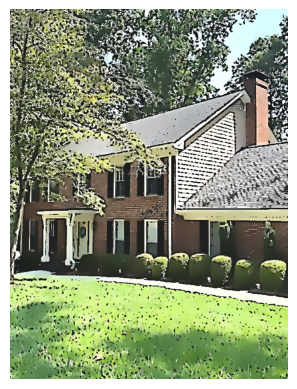

In [ ]:
import cv2
import numpy as np

# Load the image
#image = cv2.imread('cartoon_image.jpg')

# Step 1: Denoising using Bilateral Filter
# Bilateral filter preserves edges while reducing noise
denoised = cv2.bilateralFilter(cartoon_rgb, d=9, sigmaColor=75, sigmaSpace=75)

# Step 2: Edge enhancement using Unsharp Masking
# Create a Gaussian blurred version of the image
gaussian = cv2.GaussianBlur(denoised, (0, 0), 3)
# Enhance edges by adding the original image and subtracting the blurred version
sharpened = cv2.addWeighted(denoised, 1.5, gaussian, -0.5, 0)

# Step 3: Adjusting Brightness and Contrast
# You can tweak alpha (contrast) and beta (brightness) as needed
alpha = 1.2  # Simple contrast control (1.0-3.0)
beta = 20    # Simple brightness control (0-100)
enhanced = cv2.convertScaleAbs(sharpened, alpha=alpha, beta=beta)

# Step 4: Optional - Smoothing with Detail Preservation (Guided Filter)
# Using edge-preserving filtering for cartoon-like smoothness
smoothed = cv2.edgePreservingFilter(enhanced, flags=1, sigma_s=60, sigma_r=0.4)

# Display the enhanced cartoonized image
plt.imshow(smoothed)
plt.axis('off')
plt.show()


Saving southern-home-atlanta-georgia.webp to southern-home-atlanta-georgia (3).webp


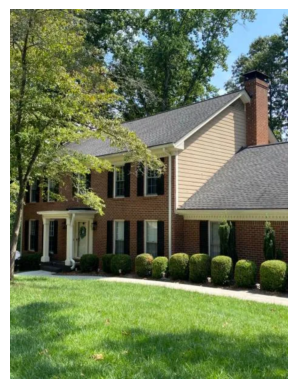

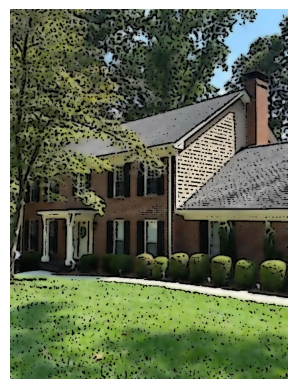

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

def upload_image():
    uploaded = files.upload()
    image_path = list(uploaded.keys())[0]
    img = cv2.imread(image_path)
    return img

def resize_image(img, target_width=600):
    height, width = img.shape[:2]
    aspect_ratio = width / height
    target_height = int(target_width / aspect_ratio)
    return cv2.resize(img, (target_width, target_height))

def display_image(img, cmap=None):
    if cmap:
        plt.imshow(img, cmap=cmap)
    else:
        plt.imshow(img)
    plt.axis('off')
    plt.show()

def convert_to_grayscale(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return cv2.medianBlur(gray, 5)

def sharpen_image(img):
    sharpen_kernel = np.array([[-1, -1, -1],
                               [-1, 9, -1],
                               [-1, -1, -1]])
    return cv2.filter2D(img, -1, sharpen_kernel)

def detect_edges(img_gray):
    return cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                 cv2.THRESH_BINARY, 7, 7)

def apply_bilateral_filter(img, no_of_filters=3):
    color = img.copy()
    for _ in range(no_of_filters):
        color = cv2.bilateralFilter(color, 9, 300, 300)
    return color

def cartoonize_image(img, edges):
    return cv2.bitwise_and(img, img, mask=edges)

def process_image():
    img = upload_image()
    img_resized = resize_image(img)
    img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
    display_image(img_rgb)
    gray_img = convert_to_grayscale(img_resized)
    #display_image(gray_img, cmap='gray')
    sharpened_img = sharpen_image(img_resized)
    sharpened_img_rgb = cv2.cvtColor(sharpened_img, cv2.COLOR_BGR2RGB)
    #display_image(sharpened_img_rgb)
    edges = detect_edges(gray_img)
    #display_image(edges, cmap='gray')
    filtered_img = apply_bilateral_filter(sharpened_img)
    filtered_img_rgb = cv2.cvtColor(filtered_img, cv2.COLOR_BGR2RGB)
    #display_image(filtered_img_rgb)
    cartoon_img = cartoonize_image(filtered_img, edges)
    cartoon_img_rgb = cv2.cvtColor(cartoon_img, cv2.COLOR_BGR2RGB)
    display_image(cartoon_img_rgb)

    return cartoon_img_rgb

cartoon_img_rgb = process_image()


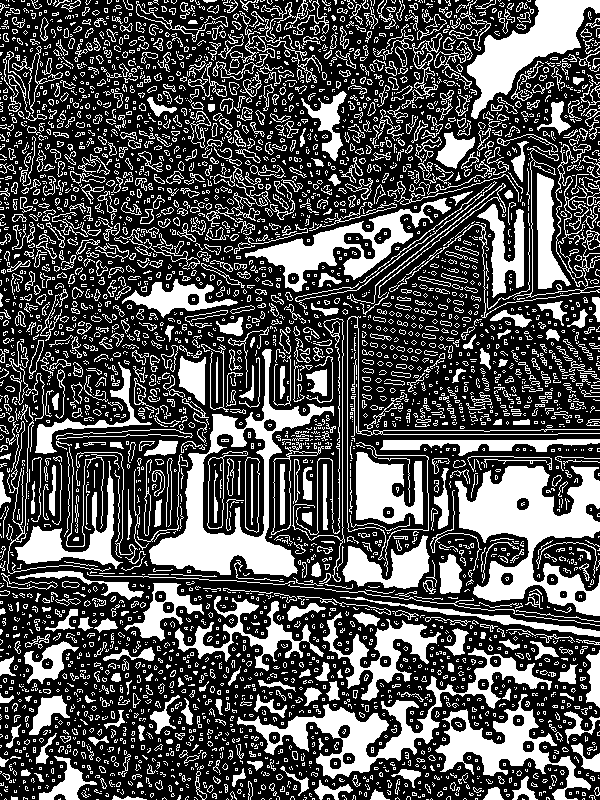

In [ ]:
import cv2

# Assuming you have already applied Canny edge detection
edges = cv2.Canny(cartoon_img_rgb, 100, 200)

# Apply adaptive thresholding to refine the edges
adaptive_thresh = cv2.adaptiveThreshold(edges, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY, 11, 2)

cv2_imshow(adaptive_thresh)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


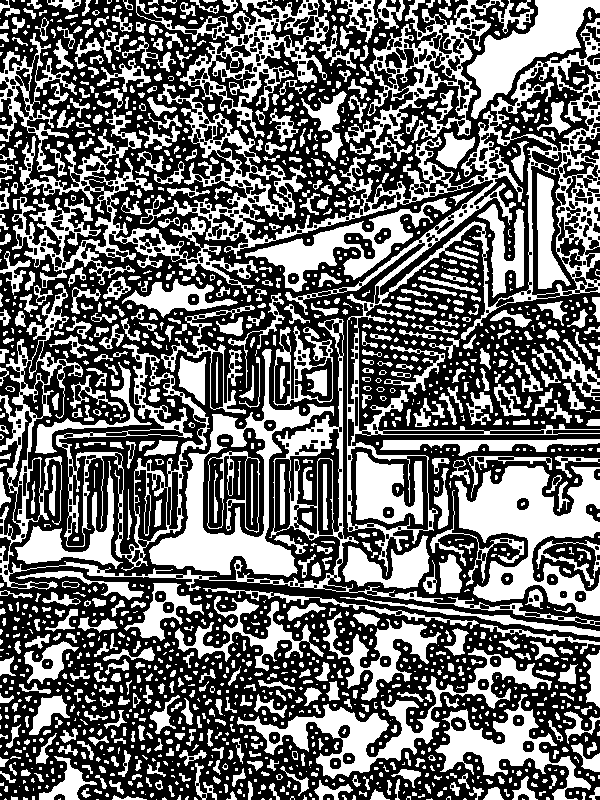

In [ ]:
import cv2
import numpy as np

# Load the image
image = cartoon_img_rgb
# Define a kernel for morphological operations
kernel = np.ones((3, 3), np.uint8)

# Perform morphological closing to clean edges
closed_edges = cv2.morphologyEx(adaptive_thresh, cv2.MORPH_CLOSE, kernel)

cv2_imshow(closed_edges)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
